In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np
from keras.applications import ResNet50
from keras.models import Model, Sequential
from tensorflow.keras import layers
from keras.callbacks import LearningRateScheduler

2024-04-19 06:34:03.758210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 06:34:03.758324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 06:34:03.858608: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = r"/kaggle/input/flowers-binary/flowers_binary/Train"
val_dir = r"/kaggle/input/flowers-binary/flowers_binary/Validation"
test_dir = r"/kaggle/input/flowers-binary/flowers_binary/Test"

In [3]:
np.random.seed(42)
batch_size = 32
img_size = (250, 250)
class_mode = 'binary'

In [4]:
train_data_gen = ImageDataGenerator(
rescale=1./255,
vertical_flip=True,
horizontal_flip=True,
shear_range=0.2,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.1,
rotation_range=0.2,
fill_mode='nearest',
brightness_range=[0.5, 1.5]
#contrast_range = [0.5, 1.5]
)

In [5]:
val_data_gen = ImageDataGenerator(
rescale=1./255
)


In [6]:
test_data_gen = ImageDataGenerator(
rescale=1./255)

In [7]:
train_generator = train_data_gen.flow_from_directory(
train_dir,
batch_size=batch_size,
target_size=img_size,
subset='training',
#validation_split = 0.2,
class_mode=class_mode,
shuffle=True)

Found 969 images belonging to 2 classes.


In [8]:
# Assuming train_generator is your data generator object
num_images_generated = train_generator.n

print("Number of images generated:", num_images_generated)
num_batches_generated = train_generator.n // train_generator.batch_size

print("Number of batches generated:", num_batches_generated)


Number of images generated: 969
Number of batches generated: 30


In [9]:
val_generator = val_data_gen.flow_from_directory(
val_dir,
#batch_size=batch_size,
target_size=img_size,
class_mode=class_mode,
#subset='validation',
#validation_size=0.2,
shuffle=True)

Found 231 images belonging to 2 classes.


In [10]:
test_generator = test_data_gen.flow_from_directory(
test_dir,
batch_size=batch_size,
target_size=img_size,
class_mode=class_mode,
    shuffle=False
)

Found 353 images belonging to 2 classes.


In [12]:
base_model = ResNet50(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.inputs, outputs=x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(250, 250, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(layers.BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(layers.BatchNormalization())
    
    model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(layers.BatchNormalization())
    
    model.add(Conv2D(256, kernel_size = (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(layers.BatchNormalization())
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)
    model.add(layers.BatchNormalization())
    
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124, 124, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,399,429 (131.22 MB)

 Trainable params: 11,465,985 (43.74 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 22,931,972 (87.48 MB)

In [17]:
model = create_model()
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


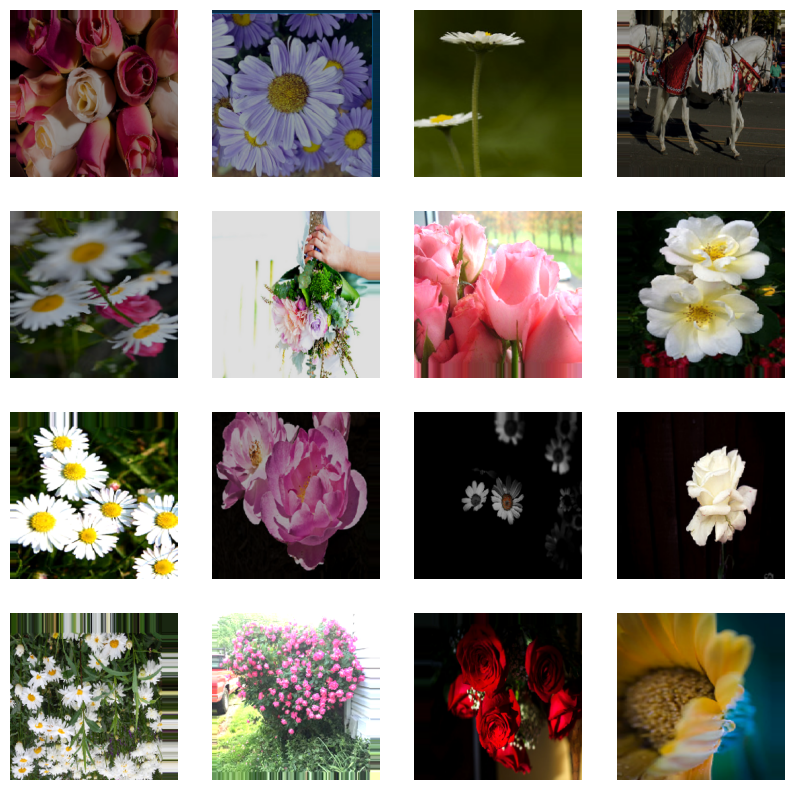

In [15]:
import matplotlib.pyplot as plt

# Retrieve a batch of images from the data generator
X_batch, y_batch = next(train_generator)

# Plot the original and augmented images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.axis('off')
plt.show()


In [22]:
# Define a step decay function
def step_decay(epoch):
    initial_lr = 0.01  # Initial learning rate
    drop = 0.05          # Factor by which the learning rate will be reduced
    epochs_drop = 10    # Number of epochs after which the learning rate will drop
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

In [23]:
history = model.fit(
train_generator,
#steps_per_epoch = batch_size-1,#len(X_train)//batch_size
epochs=50,
validation_data = val_generator,
    batch_size=batch_size,  callbacks=[lr_scheduler])
#validation_steps = len(val_generator)//batch_size)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - accuracy: 0.8492 - loss: 0.3574 - val_accuracy: 0.8615 - val_loss: 0.3125 - learning_rate: 0.0100
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step - accuracy: 0.8204 - loss: 0.4006 - val_accuracy: 0.8442 - val_loss: 0.3281 - learning_rate: 0.0100
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 403ms/step - accuracy: 0.8396 - loss: 0.3826 - val_accuracy: 0.8658 - val_loss: 0.2864 - learning_rate: 0.0100
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - accuracy: 0.8099 - loss: 0.4006 - val_accuracy: 0.8918 - val_loss: 0.2984 - learning_rate: 0.0100
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.8078 - loss: 0.4329 - val_accuracy: 0.8788 - val_loss: 0.2863 - learning_rate: 0.0100
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 394ms/step - accuracy: 0.8338 - loss: 0.4009 - val_accuracy: 0.8658 - val_loss: 0.3101 - learning_rate: 0.0100
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 399ms/step - accuracy: 0.8231 - loss: 0.

KeyboardInterrupt: 

In [21]:
model.evaluate(test_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8213 - loss: 0.4194


[0.4688219726085663, 0.779036819934845]

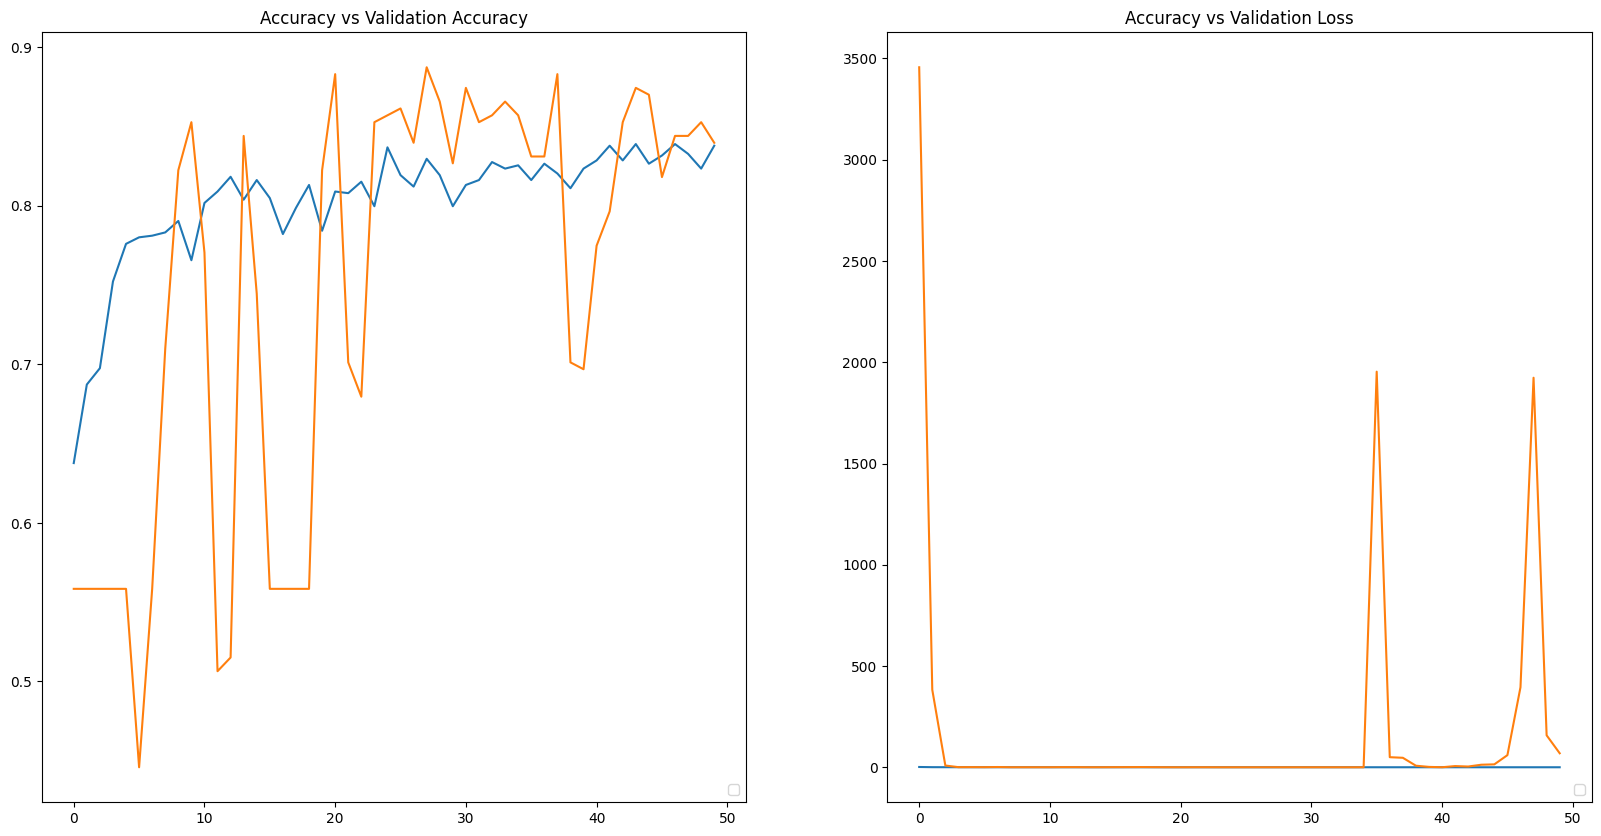

In [19]:
import matplotlib.pyplot as plt

epochs=50
plt.figure(figsize=(20, 10))
epochs_range = range(epochs)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'])
plt.plot(epochs_range, history.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'])
plt.plot(epochs_range, history.history['val_loss'])
plt.title('Accuracy vs Validation Loss')
plt.legend(loc = 'lower right')
plt.show()